In [46]:
#packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_excel('/content/drive/MyDrive/Penalty_stats_propre_19-20.xlsx')
df

,Id,Competition,Journee,Date,Home_team,Away_team,Team_taking_pen,Pen_taker,Minute,LtD_game-changing_pen,DtW_game-changing _pen,L_no_game-changing,W_no_game-changing,Scored,PT_sub,PT_position,Team_win,Last_Goal
0,1,Premier League,1,2019-08-10,West Ham,Manchester City,Away,Sergio Aguero,84.0,NO,NO,NO,YES,NO,YES,ST,YES,NO
1,2,Premier League,1,2019-08-10,West Ham,Manchester City,Away,Sergio Aguero,86.0,NO,NO,NO,YES,YES,YES,ST,YES,NO
2,3,Premier League,1,2019-08-11,Manchester United,Chelsea,Home,Marcus Rashford,18.0,NO,YES,NO,NO,YES,NO,W,YES,NO
3,4,Premier League,2,2019-08-17,Aston Villa,Bournemouth,Away,Joshua King,2.0,NO,YES,NO,NO,YES,NO,OM,YES,NO
4,5,Premier League,2,2019-08-19,Wolverhampton,Manchester United,Away,Paul Pogba,68.0,NO,YES,NO,NO,NO,NO,DM,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,490,SERIE A,38,2021-08-01,Brescia,Sampdoria,Home,Ernesto Torregrosa,49.0,YES,NO,NO,NO,YES,NO,ST,NO,YES
490,491,SERIE A,38,2021-08-01,AC Milan,Cagliari,Home,Zlatan Ibrahimovic,44.0,NO,NO,NO,YES,NO,NO,ST,YES,NO
491,492,SERIE A,38,2021-08-01,Naples,Lazio,Home,Lorenzo Insigne,54.0,NO,YES,NO,NO,YES,NO,W,YES,NO
492,493,SERIE A,38,2021-08-01,Juventus,Roma,Away,Diego Perotti,44.0,NO,YES,NO,NO,YES,NO,W,YES,NO


In [48]:
alldata=pd.DataFrame()
alldata=df
print(alldata)

      Id     Competition Journee       Date          Home_team  \
0      1  Premier League       1 2019-08-10           West Ham   
1      2  Premier League       1 2019-08-10           West Ham   
2      3  Premier League       1 2019-08-11  Manchester United   
3      4  Premier League       2 2019-08-17        Aston Villa   
4      5  Premier League       2 2019-08-19      Wolverhampton   
..   ...             ...     ...        ...                ...   
489  490         SERIE A      38 2021-08-01            Brescia   
490  491         SERIE A      38 2021-08-01           AC Milan   
491  492         SERIE A      38 2021-08-01             Naples   
492  493         SERIE A      38 2021-08-01           Juventus   
493  494         SERIE A      38 2021-08-02               SPAL   

             Away_team Team_taking_pen           Pen_taker  Minute  \
0      Manchester City            Away       Sergio Aguero    84.0   
1      Manchester City            Away       Sergio Aguero    86.0 

##I start by cleaning up the data:

*   Remove blank boxes
*   Check column types
*   Delete columns I will not use
*   Group 2 columns to create a 'Decision' column





In [49]:
#supprimer les cases vides
alldata.isnull().sum()
alldata=alldata.dropna(how='all')

In [50]:
print(alldata.dtypes)

Id                                 int64
Competition                       object
Journee                           object
Date                      datetime64[ns]
Home_team                         object
Away_team                         object
Team_taking_pen                   object
Pen_taker                         object
Minute                           float64
LtD_game-changing_pen             object
DtW_game-changing _pen            object
L_no_game-changing                object
W_no_game-changing                object
Scored                            object
PT_sub                            object
PT_position                       object
Team_win                          object
Last_Goal                         object
dtype: object


In [51]:
#Regroup 2 columns in 1 named 'Decisive'

alldata.loc[alldata[('LtD_game-changing_pen')]=='YES', 'Decisive']='YES'
alldata.loc[alldata[('DtW_game-changing _pen') ]=='YES', 'Decisive']='YES'

alldata=alldata.drop(columns=['LtD_game-changing_pen','DtW_game-changing _pen','L_no_game-changing','W_no_game-changing'], axis=1)

In [52]:
print(alldata)

      Id     Competition Journee       Date          Home_team  \
0      1  Premier League       1 2019-08-10           West Ham   
1      2  Premier League       1 2019-08-10           West Ham   
2      3  Premier League       1 2019-08-11  Manchester United   
3      4  Premier League       2 2019-08-17        Aston Villa   
4      5  Premier League       2 2019-08-19      Wolverhampton   
..   ...             ...     ...        ...                ...   
489  490         SERIE A      38 2021-08-01            Brescia   
490  491         SERIE A      38 2021-08-01           AC Milan   
491  492         SERIE A      38 2021-08-01             Naples   
492  493         SERIE A      38 2021-08-01           Juventus   
493  494         SERIE A      38 2021-08-02               SPAL   

             Away_team Team_taking_pen           Pen_taker  Minute Scored  \
0      Manchester City            Away       Sergio Aguero    84.0     NO   
1      Manchester City            Away       Sergio A

#I Pressure
##a) Difference between Home and Away pressure 
##b) Champions league pression
##c) Max pressure





###In this part, I manipulate the data to derive information on the consequence of pressure on the success percentage of penaltys

In [94]:
#a) Difference between Home and away pressure

HM=0
AM=0

nb_goal_home=0
nb_goal_away=0

for i in range(0,494):
  if alldata.iloc[i,6]=='Home':
    HM=HM+1
  if alldata.iloc[i,6]=='Away':
    AM=AM+1
  if alldata.iloc[i,9]=='YES'and alldata.iloc[i,6]=='Home':
    nb_goal_home=nb_goal_home+1

  if alldata.iloc[i,9]=='YES'and alldata.iloc[i,6]=='Away':
    nb_goal_away=nb_goal_away+1


PHM = (nb_goal_home /HM)*100
PAM = (nb_goal_away /AM)*100

print("Percentage of penalties scored in home team : %.2f"% PHM,"%","\n"
      "Percenetage of penalties scored in away team : %.2f"% PAM, "%")

Percentage of penalties scored in home team : 80.93 % 
Percenetage of penalties scored in away team : 74.26 %


We can conclude that the pressure of the Away teams fans have a consquence of 6.67%

In [54]:
#b) Champions League pressure

nb_goal_CL=0
nb_goal_CH=0

for i in range(0,186):
  if alldata.iloc[i,9]=='YES':
    nb_goal_CH=nb_goal_CH+1

for i in range(233,494):
  if alldata.iloc[i,9]=='YES':
    nb_goal_CH=nb_goal_CH+1

for i in range(187,232):
  if alldata.iloc[i,9]=='YES':
    nb_goal_CL=nb_goal_CL+1   

#Champion's league matchs
CLM=232-187
PCL=(nb_goal_CL/CLM)*100

CHM=494-CLM
PCH=(nb_goal_CH/CHM)*100

print("Penalty's percentage in Champion's league matchs : %.2f"% PCL,"%", "\n"
      "Penalty's percentage in Championship : %.2f"% PCH,"%" )

Penalty's percentage in Champion's league matchs : 77.78 % 
Penalty's percentage in Championship : 77.28 %


In [55]:
print(alldata)

      Id     Competition Journee       Date          Home_team  \
0      1  Premier League       1 2019-08-10           West Ham   
1      2  Premier League       1 2019-08-10           West Ham   
2      3  Premier League       1 2019-08-11  Manchester United   
3      4  Premier League       2 2019-08-17        Aston Villa   
4      5  Premier League       2 2019-08-19      Wolverhampton   
..   ...             ...     ...        ...                ...   
489  490         SERIE A      38 2021-08-01            Brescia   
490  491         SERIE A      38 2021-08-01           AC Milan   
491  492         SERIE A      38 2021-08-01             Naples   
492  493         SERIE A      38 2021-08-01           Juventus   
493  494         SERIE A      38 2021-08-02               SPAL   

             Away_team Team_taking_pen           Pen_taker  Minute Scored  \
0      Manchester City            Away       Sergio Aguero    84.0     NO   
1      Manchester City            Away       Sergio A

In [56]:
#c) Max pression 

goal_max_pression=0
goalscored=0
MMP=0

for i in range (0, 494):
  if alldata.iloc[i,14] =='YES':
    alldata.loc[alldata['Minute']>79, 'Cluctch']='YES'
    MMP=MMP+1

for i in range (0, 494):
  if alldata.iloc[i,15] =='YES'and alldata.iloc[i,9]=='YES':
    goal_max_pression=goal_max_pression+1

for i in range (0, 494):
  if alldata.iloc[i,9] =='YES':
    goalscored=goalscored+1

PG=(goalscored/495)*100
PMP=(goal_max_pression/90)*100


print("Total Penalty's percentage : %.2f"% PG,"%", "\n"
      "Max pression penalty's percentage : %.2f"% PMP,"%")


Total Penalty's percentage : 77.58 % 
Max pression penalty's percentage : 76.67 %


In [57]:
alldata['Cluctch'].describe()

count      90
unique      1
top       YES
freq       90
Name: Cluctch, dtype: object

In [58]:
print(alldata)

      Id     Competition Journee       Date          Home_team  \
0      1  Premier League       1 2019-08-10           West Ham   
1      2  Premier League       1 2019-08-10           West Ham   
2      3  Premier League       1 2019-08-11  Manchester United   
3      4  Premier League       2 2019-08-17        Aston Villa   
4      5  Premier League       2 2019-08-19      Wolverhampton   
..   ...             ...     ...        ...                ...   
489  490         SERIE A      38 2021-08-01            Brescia   
490  491         SERIE A      38 2021-08-01           AC Milan   
491  492         SERIE A      38 2021-08-01             Naples   
492  493         SERIE A      38 2021-08-01           Juventus   
493  494         SERIE A      38 2021-08-02               SPAL   

             Away_team Team_taking_pen           Pen_taker  Minute Scored  \
0      Manchester City            Away       Sergio Aguero    84.0     NO   
1      Manchester City            Away       Sergio A

#II Penalty taker
##a) Players who take and score the most penalties
##b) Club which take the most penalties
##c) The player positions which score the more

### The second part, I work on information about penalty takers

In [59]:
#a) Players who take the most number of penalties 

alldata['Pen_taker'].value_counts()

Ciro Immobile        15
Cristiano Ronaldo    14
Marco Mancosu        11
Domenico Criscito    10
Marcus Rashford       8
                     ..
Ross Barkley          1
Mathieu Valbuena      1
Mislav Orsic          1
Mbaye Diagne          1
Amadou Diawara        1
Name: Pen_taker, Length: 217, dtype: int64

In [60]:
#Players who score the most number of penalties 

alldata['Pen_taker'][alldata['Scored']=='YES'].value_counts()

Ciro Immobile         14
Cristiano Ronaldo     13
Marco Mancosu          9
Robert Lewandowski     7
Andrea Belotti         7
                      ..
Jonathan Ikone         1
Yaya Sanogo            1
Ferris Ngoma           1
Aaron Leya Iseka       1
Amadou Diawara         1
Name: Pen_taker, Length: 180, dtype: int64

In [61]:
print(alldata)

      Id     Competition Journee       Date          Home_team  \
0      1  Premier League       1 2019-08-10           West Ham   
1      2  Premier League       1 2019-08-10           West Ham   
2      3  Premier League       1 2019-08-11  Manchester United   
3      4  Premier League       2 2019-08-17        Aston Villa   
4      5  Premier League       2 2019-08-19      Wolverhampton   
..   ...             ...     ...        ...                ...   
489  490         SERIE A      38 2021-08-01            Brescia   
490  491         SERIE A      38 2021-08-01           AC Milan   
491  492         SERIE A      38 2021-08-01             Naples   
492  493         SERIE A      38 2021-08-01           Juventus   
493  494         SERIE A      38 2021-08-02               SPAL   

             Away_team Team_taking_pen           Pen_taker  Minute Scored  \
0      Manchester City            Away       Sergio Aguero    84.0     NO   
1      Manchester City            Away       Sergio A

In [62]:
#b) Team which gets the most number of penalties


Teampen=alldata['Home_team'][alldata['Team_taking_pen']=='Home' ].value_counts() + alldata['Away_team'][alldata['Team_taking_pen']=='Away'].value_counts()

Teampen=Teampen.sort_values(ascending=False)[:10]
Teampen


#plt.show()


Lazio                18.0
Atalanta             15.0
Juventus             15.0
Manchester City      15.0
Lecce                15.0
Roma                 14.0
Manchester United    14.0
Genoa                13.0
Inter Milan          12.0
Sampdoria            11.0
dtype: float64

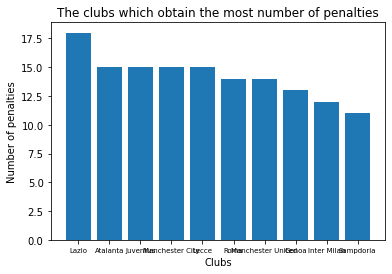

In [63]:
plt.bar(Teampen.index, Teampen.values)
plt.title('The clubs which obtain the most number of penalties')
plt.xlabel('Clubs')
plt.ylabel('Number of penalties')
plt.tick_params(axis='x', labelsize=7)
plt.show()

###The team which gets the most number of penalties in those championships is 'Lazio' with 18 penalties. We see that in the top 5 there is 4 Serie A teams. So let's compare the number of penalties obtained in the differents Championships.

In [64]:
alldata['Competition'].value_counts()

SERIE A             188
Premier League       95
Ligue 1              92
Bundesliga           73
Champions league     46
Name: Competition, dtype: int64

###Serie A competition is by far the first Championship in number of penalties taked. Serie A have more penalties taked that Premier League and Ligue 1 combined.

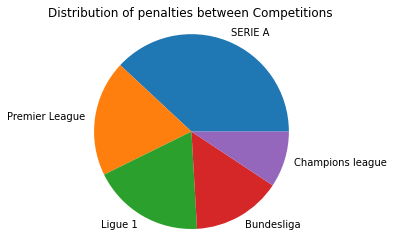

In [65]:
C=alldata['Competition'].value_counts()
plt.pie(C, labels=C.index)
plt.title('Distribution of penalties between Competitions')
plt.axis('equal')
plt.show()

In [76]:

#alldata['Competition'][alldata['Competition']=='SERIE A'].value_counts()
Pleague=pd.DataFrame()
Pleague=alldata['Competition']=='Premier League'
#Pleague['Home_team'][Pleague['Team_taking_pen']=='Home'].value_counts()# + alldata['Away_team'][alldata['Team_taking_pen']=='Away'].value_counts()
print(Pleague)
#PLeague


0       True
1       True
2       True
3       True
4       True
       ...  
489    False
490    False
491    False
492    False
493    False
Name: Competition, Length: 494, dtype: bool


In [81]:
#alldata.Competition.value_counts
alldata['Competition'].value_counts()

SERIE A             188
Premier League       95
Ligue 1              92
Bundesliga           73
Champions league     46
Name: Competition, dtype: int64

In [67]:
#c) The player positions which score the more

alldata['PT_position'][alldata['Scored']=='YES'].value_counts()

ST    187
W      74
OM     57
DM     49
LD     11
CB      6
Name: PT_position, dtype: int64

###Of course the position which gets the most number of penalties is ST beacause the striker is more often in the oppoent's box.

#III Condition
##a) Sub Players percentage
##b) Minutes of penalties obtained

In [69]:
alldata['PT_sub'].value_counts()


NO     461
YES     33
Name: PT_sub, dtype: int64

In [70]:
alldata['PT_sub'][alldata['Scored']=='YES'].value_counts()

NO     359
YES     25
Name: PT_sub, dtype: int64

In [93]:

Psub=(25/33)*100
print("Percentage of the subs : ""%2.f"%Psub,"%")


Percentage of the subs : 76 %


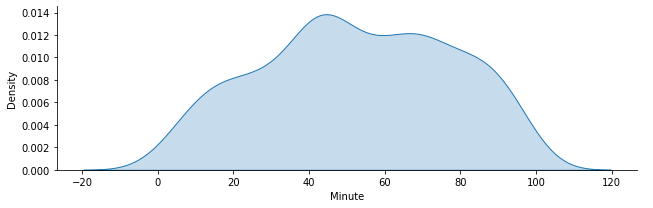

In [85]:
#b) Minutes of penalties obtained

fig = sns.FacetGrid(df, aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
fig.map(sns.kdeplot, "Minute", shade=True)
fig.add_legend()

### We see that the moment where teams have the best percentage to obtained a penalty is near the half time

Finally, I convert the data to output an Excel file

In [74]:
#alldata.to_excel('Penaltyapres.xlsx')